# Hummed and Whistled Song Classification using Machine Learning

# 1 Author

**Student Name:**  Daria Gorbunova

**Student ID**: 231173199



# 2 Problem formulation

## 2.1 Type of problem:
This machine learning problem is a multi-class classification one. The goal is to take a 10-second audio of a hum or a whistle, from the provided dataset, and determine which of the 8 possible song the audio is from. The possible song labels in this problem are:
1. Happy
2. Try Everything
3. Remember Me
4. New York
5. Friend
6. Necessities
7. Feeling
8. Married

Since the input data (audio clip) has a label, this is a supervised learning task.

## 2.2 The dataset:
The dataset MLEnd Hums and Whistles II has been provided by the module team. The dataset was created with student contributions, where each student was tasked to provide:
- 4 humming instances
- 4 whistling instances

per each of the 8 songs outlined above. 

However, some participants could not whistle and were instead given permission to supply 8 humming instances only. This led to uneven numbers of hums vs whistles in the raw collected data. 
After the examination of the subset (800 samples) provided for this mini project, using a file-counting script:
- The dataset has 800 samples.
- The number of instances of hums and whistles is balanced equally. 
- Each of the 8 song classes has 100 instances. 

Therefore, the subset of the dataset released by the teaching team for this task is balanced, which reduces the risk of class imbalance, which is ideal for machine learning models.

## 2.3 Nature of instances:
Each instance of the dataset consists of human-recorded raw waveform audio of differing lengths. Before providing the dataset, the module team applied basic preprocessing to clean the raw submissions. This included trimming of long silences, removing obvious background noise where possible and normalising audio volume.

However, the dataset will still contain substantial real-world variations due to the nature of the recordings, they are affected by factors such as different microphones, different acoustic environments, just to name a few. 

Audio instances are high dimensional, and even 5 second clip samples at 16kHz contain around 80,000 raw waveform values. For this reason, raw audio cannot be used directly with ML models and feature extraction is required, this will be outlined in the methodology section. 

## 2.4 What makes the problem interesting:
- High variability in humming and whistling: people hum and whistle differently, there is varibaility in pitch stability, tempo and rhythm. Even the same person can reproduce the same melody inconsistently. 
- Similarity between some melodies: certain songs in the dataset share similar rhythmic patterns.
- Recording and environemntal noise: audio was captured through the same software, but with different devices, microphones and under different acoustic conditions. Despite preprocessing done by module team, variation remains.
- Complex, high-dimensional input: raw audio is highly dimensional and relationship between raw waveform and melody is higly non-linear, which cannot be learned by classical methods. Featuer extraction is required to represent the instances better.

# 3 Methodology
## 3.1 Overview of methodology
The overall methodology will follow the standard supervised learning pipeline for audio classification. 
- Loading the dataset. 
- Preprocessing raw audio waveform to extract meaningful features.
- Training a range of machine learning models.
- Optimising hyperparameters using the validation data.
- Evaluating final performance on the test set.
- Comparing models to reflect on results across them. 

## 3.2 Audio preprocessing
As mentioned in the problem formulation, raw waveform data is highly dimensional and not very useful for machine learning algorithms. Preprocessing of the data will include:
- Loading audio files using librosa at a fixed sampling rate of 16khz. 
- Normalising amplitude to reduce loudness variation.
- Converting waveforms into 2D time-frequency representations using MFCCs and Mel spectograms. 
- Trimming to make sure all the instances are 10 seconds long, and have a consistent number of frames. 
- Scalling features.

MFCCs will be used for Logistic Regression, KNN and MLP. 

Mel-spectograms will be used for CNNs to preserve spatial patterns required for convolution. 

## 3.3 Data splitting
To ensure correct evaluation of the models, the larger dataset will be divided into:
- Training set, used to fit model
- Validation set, used for hyperparameter turning and model selection.
- Testing set, used at the end to estimate genralisation performance.

A stratified split will be used to maintian balanced class proportion for all 8 songs. The full methodology and implementation of data splitting is outlined in Ssection 5 - Datasets. 

## 3.4 Models considered
A range of models will be implemented to examine how perfromance changes with model complexity. 
### 3.4.1 Logistic Regression
A simple linear classifier, used for baseline to commpare more advanced models against. Logistic regression is fast to train and interpretable. It directly uses flattened extracted features from data preprocessing. 

Not expected to perform well as humming and whistling data is non linear. 
### 3.4.2 k-Nearest Neighbours (KNN)
Non-parametric and memory based model which is easy to implement and useful for examining how the data clusters after feature extraction using MFCC. This model will be sensitive to feature scaling and high-dimensionality, but is expected to have better performance depending on k. 
### 3.4.3 Multi-layer Perceptron (MLP)
Fully connected neural network that can model non linear relationships in the data. Also works from flattened features extracted using MFCC, but has risks of overfitting if hyperparameters are not tuned carefully. 
### 3.4.4 Convolutional Neural Network (CNN)
Deep learning model capable of extracting spatial patterns from 2D representations. Highest expected performance due to ability to learn hierachical features. Not as easy to implement, due to factors such as regularisation, and more computationally expensive with added risk of overffiting on small datasets. 

## 3.5 Performance Metrics
Model performance will be quanitified using:
- Accuracy to determine the percentage of correctly classified test samples.
- Confusion matrix to provide insights into which classes are being misclassified. 
- Loss curves for MLP and CNN to help diagnose overfitting. 

Accuracy, although not always best to evaluate models, is appropriate in this case as this is a balanced multi-class classification task. 

## 3.6 Validation Task
Validation task inloves the selection of the best parameters such as k in KNN and learning rates. Comparing performance across models with these tuned parameters on the validation data. It is also where I will check if the model is overffiting, by monitoring training and validation accuracy, and selecting the model with best performance to take to the testing set.


# 4 Implemented ML prediction pipelines
The main idea of the prediction pipelines in this project is to convert raw audio recordings from the dataset into inputs suitable for machine learning models, mapping these representations to one of the eight song labels. 

The pipeline is a sequence of processing stages, each applying some transformation to the data into a new intermediate representation, which finally leads to a class label. Since I am going to implement 4 models, I have two main pipelines:

- Pipeline A: used by Logistic Regression, k-Nearest Neighbours (kNN) and Multi-Layer Perceptron (MLP)
- Pipeline B: used for Convolutional Neural Network

The need for two pipelines comes from the fact that both share the same loading procedure, but differ in feature extraction stages.

## 4.1 Transformation stage
During this stage raw waveform audio data is converted into meaningful features which can be used for machine learning, as original data is too high-dimensional and unsuitable for the task. All audio files are loaded at a fixed sampling rate and their amplitude is normalised, and finally features are extracted. 
### 4.1.1 Pipeline A
**Input:** audio waveform instances from the dataset
**Transformations:**
- Audio is trimmed to a fixed 10 second duration.
- Mel-Frequency Cepstral Coefficient (MFCCs) are computed.
- MFCC matrix is flattened by averaging across time interval (10 seconds)
- Features are scaled using StandardScaler
**Output:** Fixed-length feature vector suitable for machine learning models 1-3. 

After the transformation is done, MFCC has compressed the signal into a meaningful space while reducing dimensionality, so data can be used in this task. 
MFCC works by converting the audio into short frames and then looking at which frequencies are resent. The frequency spectrum is then compressed using triangular Mel filters. Logarithmic values are taken and most important coefficients are kept using DCT.

Since the result is a vector, this makes it ideal for logistic regression, kNN and MLPs which use vector inputs. 
### 4.1.2 Pipeline B
**Input:** audio waveform instances from the dataset
**Transformations:**
- Audio is trimmed to a fixed 10 second duration.
- Mel-spectogram is generated
- Log scaling is applied to stabilise for variance
- Resulting 2D time-frequency array is normalised
**Output:** 2D array representing a spectogram suitable for a convolution network. 

CNN looks at spatial locality and patterns in the 2D data. Using this method we preserve meaningful time-frequency relationships which are then used by CNN to learns hierarchical audio features which cant be accessed by simpler models. 

## 4.2 Model stage
Eac processed feature representation is passed into a classification model, three of the models use the same input format which are MFCC vectors, and CNN uses a 2D spectogram array.

### 4.2.1 Logistic Regression
**Input:** Flattened MFCC vector

**Output:** Probability distirbution over 8 classes 

Logistic regression acts as a simple model which can be used as a baseline and benchmarking for other models. It is also used to see if features extracted in previous stage contain enough information to be modelled linearly. 

### 4.2.2 k-Nearest Neighbours (kNN)
**Input:** Flattened MFCC vector

**Output:** Predicted class label from majority vote among k closest samples. 

Reveals natural cluster structure in MFCC (feature) space, non parametric baseline. Makes no assumption about the underlying data line Logistic regression did. 

### 4.2.3 Multi-layer Perceptron (MLP)
**Input:** Flattened MFCC vector

**Architecture:** Dense layers with nonlinear activations, ending with a softmax layer

**Output:** Class probabilities 

Can learn non linear relationships between MFCC extracted features without requiring convolution. Unlike Logistic Regression, can model more complex relationships as it can learn non linear transformations, potentially expected to perform better. 

### 4.2.4 Convolutional Neural Network (CNN)
**Input:** 2D mel-spectogram array

**Architecture:** Convolution, activation, pooling, followed by dense layers.

**Output:** Class probabilities

Can capture time-frequency patterns and learn hierarcial representations, best for audio classification out of the three previous models.

## 4.3 Ensemble stage

For my mini project I will not implement an ensemble method. 

Techniques such as bagging, boosting or stacking can improve predicion performance of models as it combines multiple models. I chose to train multiple deep learning and classical models instead, as outlined above. 

The aim of my project is to compare individual model families like linear models, instance-based models, neural networks and convolutional networks. Implementing an ensemble stage on top of this would make it harder to evaluate the model families independently. 

Therefore, the model stage includes four models and pipelines that are described above and the ensemble stage is intentionally left out.

# 5 Dataset
## 5.1 Overview of dataset construction
All datasets that I will create in this section are derived from the MLEnd Hums and Whistles II dataset. For this project, the 800-sample version is used exclusively. The reason for this is because 800-sample dataset fully contains all samples from the 400 one, and more on top. Using the bigger dataset provides a larger, more diverse set of recordings, which is importants for training machine learning models. 

The original dataset has 800 audio recordings, each is either a hum or a whistle of one of eight song classes. Each file is labelled under the same convention that encodes both the song and whether the recording is a hum or a whistle. 

The goal of this section is to build the training, validation and testing datasets which will be used in the training and evaluation of models in this project. 

All raw audio files will be loaded, labelled, preprocessed and then split into subsets for training, validation and testing. 

Original dataset is balanced across the eight classes (100 instances per class).

## 5.2 Ensuring IID, balance, independence
- To ensure fair evaluation across all models all the files will first be shuffled. 
- Strattified sampling will then be used so that each class maintains equal representation in training, validationa and testing sets. 
- The splits are all mutually exclusive, meaning no audio clip appears in more than one dataset. 
- Instances are treated as independent and identically treated as each one is a separate human performance, there is not dependence between them, and metadata indicates unique recording per file. 

The split of data between the three parts for each dataset are:
- 70% training
- 15% validation
- 15% testing

Logistic Regression, kNN and MLP will be trained on training set of Dataset A. NLP parameters will be fine tuned on validation set of Database A. And all three models' performances will be evaluated on Dataset A's testing data. 

CNN will be trained on Dataset B's training data, fine-tuned with Dataset B's validation data and performance evaluated on Dataset B's testing data. 

## 5.3 Dataset A (MFCC-based)
This follows Transformation stage of Pipeline A and is designed for classical ML models: Logistic Regression, k-Nearest Neighbours and MLP.

Each audio file:
1. Is loaded as waveform at a fixed sampling rate of 16kHz.
2. Trimmed to a consistent duration fo 10 seconds. 
3. Normalised for amplitude. 
4. Compute MFCC features. 
5. MFCC time series is collapsed by averaging across time to form fixed length feature vector. 
6. Features are scaled using StandardScaler. 

The following NumPy arrays are created and stored:

- X_train_mfcc.npy, X_val_mfcc.npy, X_test_mfcc.npy (1-D feature vectors)
- y_train.npy, y_val.npy, y_test.npy (corresponsing integer labels, shared with Dataset B)




In [7]:
# imports 
import os
import numpy as np
import librosa
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

DATA_DIR = "../data/MLEndHWII_Sample_800" # original dataset path
SAMPLE_RATE = 16000 # 16 kHz
DURATION = 10  # 10 seconds
FIXED_LENGTH = SAMPLE_RATE * DURATION  

# loading filenames and sorting
files = [f for f in os.listdir(DATA_DIR) if f.endswith(".wav")]
files.sort()

print("Number of audio files:", len(files))

# file name format exmaple: S1_hum_2_Necessities.wav
# file name format :        {sample_num}_{hum/whistle}_{class_label}.wav
# extracting class labels from file names

def extract_label(filename):
    components = filename.split("_") # split by underscore  
    end = components[-1].split(".") # split last part by dot {class_label}.wav
    class_label = end[0]  # get class label
    return class_label

labels = np.array([extract_label(f) for f in files])

# sorting and converting label classes to integers for classification
unique = sorted(list(set(labels)))
label_to_int = {label: i for i, label in enumerate(unique)}
y = np.array([label_to_int[l] for l in labels])

print("Unique classes found:", unique) # checking all class names exist

X_mfcc = [] # list to hold MFCC feature vectors

# loading audio files, padding/trimming to fixed length, computing MFCCs
for f in files:
    path = os.path.join(DATA_DIR, f)

    # load audio using librosa
    audio, sr = librosa.load(path, sr=SAMPLE_RATE)

    # pad/trim to fixed length
    if len(audio) > FIXED_LENGTH:
        audio = audio[:FIXED_LENGTH]
    else:
        audio = np.pad(audio, (0, FIXED_LENGTH - len(audio)))

    # compute MFCC features and collapse to 1D vector
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40) # 40 coefficients
    mfcc_mean = mfcc.mean(axis=1)

    X_mfcc.append(mfcc_mean)

X_mfcc = np.array(X_mfcc) # the whole dataset as numpy array of feature vectors
print("MFCC dataset shape:", X_mfcc.shape) 


# stratified splitting to maintain class distribution 
# 70% train, 15% val, 15% test
# first split into train 70% and temp 30%
X_train, X_temp, y_train, y_temp = train_test_split(X_mfcc, y, test_size=0.30, random_state=42, stratify=y)

# then split temp into val 15% and test 15%
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

print("Train size:", X_train.shape)
print("Val size:", X_val.shape)
print("Test size:", X_test.shape)


# standard scaling on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# saving processed datasets
os.makedirs("../data/processed", exist_ok=True)

np.save("../data/processed/X_train_mfcc.npy", X_train_scaled)
np.save("../data/processed/X_val_mfcc.npy", X_val_scaled)
np.save("../data/processed/X_test_mfcc.npy", X_test_scaled)

np.save("../data/processed/y_train.npy", y_train)
np.save("../data/processed/y_val.npy", y_val)
np.save("../data/processed/y_test.npy", y_test)

print("Saved MFCC datasets in data/processed/")


Number of audio files: 800
Unique classes found: [np.str_('Feeling'), np.str_('Friend'), np.str_('Happy'), np.str_('Married'), np.str_('Necessities'), np.str_('NewYork'), np.str_('RememberMe'), np.str_('TryEverything')]
MFCC dataset shape: (800, 40)
Train size: (560, 40)
Val size: (120, 40)
Test size: (120, 40)
Saved MFCC datasets in data/processed/


## 5.4 Dataset B (Spectogram-based)
This follows Transformation stage of Pipeline B and is designed for CNN use only, which requires 2D structured inputs. 

Each audio file:
1. Is loaded as waveform at a fixed sampling rate of 16kHz. 
2. Normalised for amplitude. 
3. Generates Mel-spectogram using short-time Fourier transform followed by Mel filterbanks. 
4. Log-scaled to stabilise variance.
5. Resized to consistent shapes (equivalent of trimming to 10 seconds for Pipeline A, for consistency)
6. Normalised.

The following NumPy arrays are created and stored:

- X_train_spec.npy, X_val_spec.npy, X_test_spec.npy (2D feature matrix)
- y_train.npy, y_val.npy, y_test.npy (corresponsing integer labels, shared with Dataset A)
 


In [8]:
# imports 
import os
import numpy as np
import librosa
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

DATA_DIR = "../data/MLEndHWII_Sample_800" # original dataset path
SAMPLE_RATE = 16000 # 16 kHz
DURATION = 10  # 10 seconds
FIXED_LENGTH = SAMPLE_RATE * DURATION  

# loading filenames and sorting
files = [f for f in os.listdir(DATA_DIR) if f.endswith(".wav")]
files.sort()

print("Number of audio files:", len(files))

# file name format exmaple: S1_hum_2_Necessities.wav
# file name format :        {sample_num}_{hum/whistle}_{class_label}.wav
# extracting class labels from file names

def extract_label(filename):
    components = filename.split("_") # split by underscore  
    end = components[-1].split(".") # split last part by dot {class_label}.wav
    class_label = end[0]  # get class label
    return class_label

labels = np.array([extract_label(f) for f in files])

# sorting and converting label classes to integers for classification
unique = sorted(list(set(labels)))
label_to_int = {label: i for i, label in enumerate(unique)}
y = np.array([label_to_int[l] for l in labels])

print("Unique classes found:", unique) # checking all class names exist

# spectogram dataset
X_spec = []

# spectrogram parameters
N_MELS = 64          # number of Mel filters
HOP_LENGTH = 512     # controls time resolution
FMIN = 20
FMAX = SAMPLE_RATE // 2

for f in files:
    path = os.path.join(DATA_DIR, f)

    # load audio using librosa
    audio, sr = librosa.load(path, sr=SAMPLE_RATE)

    # pad/trim to fixed length
    if len(audio) > FIXED_LENGTH:
        audio = audio[:FIXED_LENGTH]
    else:
        audio = np.pad(audio, (0, FIXED_LENGTH - len(audio)))

    # compute mel-spectrogram
    mel = librosa.feature.melspectrogram(
        y=audio,
        sr=SAMPLE_RATE,
        n_mels=N_MELS,
        fmin=FMIN,
        fmax=FMAX,
        hop_length=HOP_LENGTH
    )

    # convert to log scale
    mel_db = librosa.power_to_db(mel, ref=np.max)

    # normalise spectrogram
    mel_norm = (mel_db - mel_db.mean()) / (mel_db.std() + 1e-6)

    X_spec.append(mel_norm)

X_spec = np.array(X_spec)

print("Spectrogram dataset shape:", X_spec.shape)  
# expected shape: (800, 64, ~310) depending on hop size

# stratified splitting to maintain class distribution 
# 70% train, 15% val, 15% test
# first split into train 70% and temp 30%
X_train, X_temp, y_train, y_temp = train_test_split(
    X_spec, y, test_size=0.30, random_state=42, stratify=y
)

# then split temp into val 15% and test 15%
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)

print("Train:", X_train.shape)
print("Val:  ", X_val.shape)
print("Test: ", X_test.shape)


# saving processed datasets
os.makedirs("../data/processed", exist_ok=True)

np.save("../data/processed/X_train_spec.npy", X_train)
np.save("../data/processed/X_val_spec.npy", X_val)
np.save("../data/processed/X_test_spec.npy", X_test)

np.save("../data/processed/y_train.npy", y_train)
np.save("../data/processed/y_val.npy", y_val)
np.save("../data/processed/y_test.npy", y_test)

print("Saved spectrogram datasets in data/processed/")

Number of audio files: 800
Unique classes found: [np.str_('Feeling'), np.str_('Friend'), np.str_('Happy'), np.str_('Married'), np.str_('Necessities'), np.str_('NewYork'), np.str_('RememberMe'), np.str_('TryEverything')]
Spectrogram dataset shape: (800, 64, 313)
Train: (560, 64, 313)
Val:   (120, 64, 313)
Test:  (120, 64, 313)
Saved spectrogram datasets in data/processed/


## 5.5 Exploratory analysis
Now that I have created training, validation and testing splits for both datasets A and B, before training any machine learning models, it is important to verify they have been created correctly. The sizes (number of samples) should be as follows:
- Training 800 x 0.7 = 560
- Validation 800 x 0.15 = 120
- Testing  800 x 0.15 = 120

The goal of this section is not to perform full data exploration, but to carry out sanity checks that confirm the datasets are usable, consistent and suitable for training and evaluation stages with the models. 

These checks endure preprocessing pipeline worked as intented and that no issues such as corrupted samples, missing value or unexpected class balance have arisen. 


1. I will start by verifying the shapes of the MFFc and spectogram feature arrays, confirming that the tran/validation/test splits all contain the expected number of samples.
2. I will also check for any missing values or invalid values after preprocessing occured and arrays were saved. 
3. Additionally, I include simple visualisations of an example MFCC vector and an example Mel spectrogram to confirm that the extracted features have the expected structure.

### 5.5.1 Loading saved Dataset A and B and checking their shapes

In [12]:
import numpy as np

# load dataset A
X_train_mfcc = np.load("../data/processed/X_train_mfcc.npy")
X_val_mfcc   = np.load("../data/processed/X_val_mfcc.npy")
X_test_mfcc  = np.load("../data/processed/X_test_mfcc.npy")

print("Dataset A:")
print("X_train_mfcc:", X_train_mfcc.shape)
print("X_val_mfcc:  ", X_val_mfcc.shape)
print("X_test_mfcc: ", X_test_mfcc.shape)


# load dataset B
X_train_spec = np.load("../data/processed/X_train_spec.npy")
X_val_spec   = np.load("../data/processed/X_val_spec.npy")
X_test_spec  = np.load("../data/processed/X_test_spec.npy")

print("\nDataset B:")
print("X_train_spec:", X_train_spec.shape)
print("X_val_spec:  ", X_val_spec.shape)
print("X_test_spec: ", X_test_spec.shape)

# loading labels
y_train = np.load("../data/processed/y_train.npy")
y_val   = np.load("../data/processed/y_val.npy")
y_test  = np.load("../data/processed/y_test.npy")

print("\nLabels:")
print("y_train:", y_train.shape)
print("y_val:  ", y_val.shape)
print("y_test: ", y_test.shape)

print("\nData loaded successfully.")

Dataset A:
X_train_mfcc: (560, 40)
X_val_mfcc:   (120, 40)
X_test_mfcc:  (120, 40)

Dataset B:
X_train_spec: (560, 64, 313)
X_val_spec:   (120, 64, 313)
X_test_spec:  (120, 64, 313)

Labels:
y_train: (560,)
y_val:   (120,)
y_test:  (120,)

Data loaded successfully.


#### Findings:
The output confirms that both Dataset A and B were created correctly and can be loaded in from their saves. 

For Dataset A:

Each sample is represented as a 40-dimensional MFCC vector, so the shapes with the splits outlined above should be:
- (560, 40) for training
- (120, 40) for validation
- (120, 40) for testing 
This is consistent with the outputs.


For Dataset B:

Each sample is 2D mel-spectogram. The parameters applied at preprocessing were freq_bins=64, time_frames=313, so the shapes with the splits outlined above should be:
- (560, 64, 313) for training
- (120, 64, 313) for validation
- (120, 64, 313) for testing 
This is consistent with the outputs.

The preprocessing pipeline executed correctly. Dataset A and B both contain the expected number of samples. The splits are consistent and ready for further analysis and model training.

### 5.5.2 Checking for missing or corrupted values

In [22]:
import numpy as np

# check NaNs, infs
def check(name, X, y):
    print(f"\n{name} Shape: {X.shape}")

    # NaNs
    print("NaNs in X:", np.isnan(X).sum())
    print("NaNs in y:", np.isnan(y).sum())
  
    # infs
    print("Infs in X:", np.isinf(X).sum())


# Dataset A 
X_train_mfcc = np.load("../data/processed/X_train_mfcc.npy")
X_val_mfcc   = np.load("../data/processed/X_val_mfcc.npy")
X_test_mfcc  = np.load("../data/processed/X_test_mfcc.npy")

y_train = np.load("../data/processed/y_train.npy")
y_val   = np.load("../data/processed/y_val.npy")
y_test  = np.load("../data/processed/y_test.npy")

check("Dataset A - Train", X_train_mfcc, y_train)
check("Dataset A - Val",   X_val_mfcc,   y_val)
check("Dataset A - Test",  X_test_mfcc,  y_test)

# Dataset B 
X_train_spec = np.load("../data/processed/X_train_spec.npy")
X_val_spec   = np.load("../data/processed/X_val_spec.npy")
X_test_spec  = np.load("../data/processed/X_test_spec.npy")

# labels are shared with dataset A
check("Dataset B - Train", X_train_spec, y_train)
check("Dataset B - Val",   X_val_spec,   y_val)
check("Dataset B - Test",  X_test_spec,  y_test)



Dataset A - Train Shape: (560, 40)
NaNs in X: 0
NaNs in y: 0
Infs in X: 0

Dataset A - Val Shape: (120, 40)
NaNs in X: 0
NaNs in y: 0
Infs in X: 0

Dataset A - Test Shape: (120, 40)
NaNs in X: 0
NaNs in y: 0
Infs in X: 0

Dataset B - Train Shape: (560, 64, 313)
NaNs in X: 0
NaNs in y: 0
Infs in X: 0

Dataset B - Val Shape: (120, 64, 313)
NaNs in X: 0
NaNs in y: 0
Infs in X: 0

Dataset B - Test Shape: (120, 64, 313)
NaNs in X: 0
NaNs in y: 0
Infs in X: 0


#### Findings
This step checks whether Dataset A and Dataset B contain any missing or infitnite values. 

The printed output shows:
- Number of NaN values
- Number of inf values

If all results return 0, the datasets are clean and ready for model training, which they are. 

### 5.5.3 MFCC visualisation:

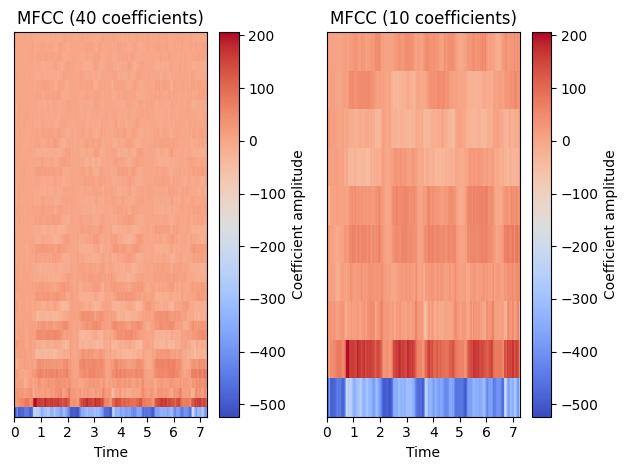

In [30]:
# mfcc visualisation
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os

# choose any file from dataset A
sample_file = "../data/MLEndHWII_Sample_800/" + os.listdir("../data/MLEndHWII_Sample_800")[0]

# load audio
audio, sr = librosa.load(sample_file, sr=16000)

# trim/pad to 10s (same as pipeline)
FIXED_LENGTH = 16000 * 10
if len(audio) > FIXED_LENGTH:
    audio = audio[:FIXED_LENGTH]
else:
    audio = np.pad(audio, (0, FIXED_LENGTH - len(audio)))

# compute MFCCs with different coefficients
mfcc1 = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
mfcc2 = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=10)

# MFCC with 40 coefficients
plt.subplot(1, 2, 1)
librosa.display.specshow(mfcc1, x_axis='time')
plt.title('MFCC (40 coefficients)')
plt.colorbar(label='Coefficient amplitude')

# MFCC with 10 coefficients
plt.subplot(1, 2, 2)
librosa.display.specshow(mfcc2, x_axis='time')
plt.title('MFCC (10 coefficients)')
plt.colorbar(label='Coefficient amplitude')

plt.tight_layout()
plt.show()


#### Findings:
The generated heat maps visualisation compares MFCC extracted with 40 coefficients (Dataset A) versus 10 coefficients, showing how the number of coefficients affect the richness of the representation:
- 40 coefficient MFCC captures higher level of details. THe heatmap is more detailed and textured, indicating a higher-dimensional represetation.
- 10 coefficients MFCCs capture only broad spectral details. Much smoother representation, details are lost. Still preserves overall pitch countour but not detailed. 

This shows that having more coefficients leads to higher dimensionality, but richer representation, which is why 40 coefficients was the go to for this project, it is expressive enough to capture features in the data for Logistic Regression, kNN and MLP, whilst still keeping the dimensionality reasonble. 

### 5.5.4 Visualising Spectogram

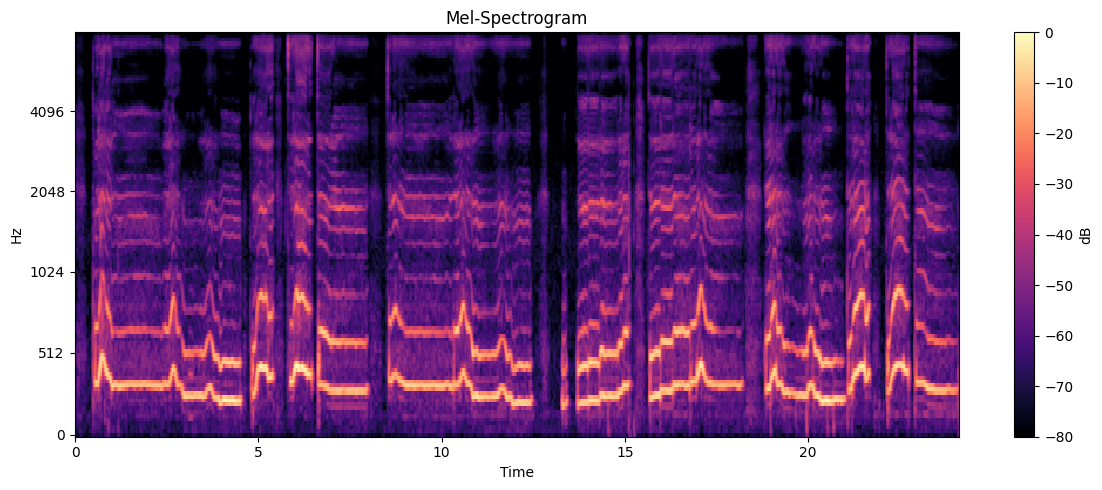

In [33]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os

# dataset raw directory
DATA_DIR = "../data/MLEndHWII_Sample_800"
files = sorted([f for f in os.listdir(DATA_DIR) if f.endswith(".wav")])

# load first file for visualisation
sample_file = os.path.join(DATA_DIR, files[0])
audio, sr = librosa.load(sample_file, sr=16000)

# compute mel-spectrogram
spectrogram = librosa.feature.melspectrogram(
    y=audio,
    sr=sr,
    n_mels=128,
    fmax=8000
)

visual = librosa.power_to_db(spectrogram, ref=np.max)

# plot 
plt.figure(figsize=(12, 5))
librosa.display.specshow(visual, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(label="dB")
plt.title("Mel-Spectrogram")
plt.tight_layout()
plt.show()


#### Findings:
The visualisation shows the expected time frequency structure of a humming or whistling signal. The orange signals represent strong harmonic content which is likely to be humming. The repeated curved pattern shows melodic pattern, representing a consistent tune. The darker regions are periods of silence. 

This visual shows the full duration of the random file, the structure is correct and confirms that the data contains clearn patterns which can be used in the CNN model. The model will look at this and examine temporal progression and harmonic structure, which is not present in MFCC visualisation, hence why classical models are expected to perfrom worse. 

### 5.5.5 Conluding the exploration 
The exploratory checks confirm that both Dataset A and Dataset B were processed correctly and all samples share consistent shapes, no missing values are present, and the class distributions are perfectly balanced across all splits as intended. 

The example MFCC and spectrogram visualisations also indicate that the feature extraction stages behaved correctly. With these verifications completed, the datasets can be used confidently for the training, validation, and testing of the models.

## 5.6 Limitations
Despite being balanced and cleaned, the dataset still has limitations, such as:
- Variation in length, which leads to information loss when trimming
- Different recording equipment and environemnts create variability. 
- Small dataset size (100 per class) likely will limit model generalisation. 
- Similarity between classes as certain melodies may confuse simpler models.

# 6 Experiments and results

Carry out your experiments here. Analyse and explain your results. Unexplained results are worthless.

# 7 Conclusions

Your conclusions, suggestions for improvements, etc should go here.

# 8 References

Acknowledge others here (books, papers, repositories, libraries, tools)